## 🎯 Zylentrix Data Analyst Intern Assessment

Welcome to my data analysis submission for the Zylentrix Internship. This notebook walks through the entire analytical process — from data loading and cleaning to exploration and visualization — to uncover insights that drive user engagement and platform performance.

---

**Project Goal**: Analyze student engagement on Zylentrix's online learning platform to identify patterns, pain points, and opportunities for improvement.


## 📚 Step 1: Import Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

## 🗂️ Step 2: Load the Dataset

We'll load the main dataset containing student activity records.


In [3]:
student_df=pd.read_csv("students.csv")

In [4]:
student_df.shape

(100, 6)

In [5]:
student_df.sample(20)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
57,S058,Student_58,33,Male,Bangalore,13/11/2023
98,S099,Student_99,18,Male,Kolkata,17/12/2023
32,S033,Student_33,32,Male,Mumbai,23/03/2023
89,S090,Student_90,29,Female,Kolkata,06/05/2023
14,S015,Student_15,18,Other,Bangalore,16/01/2023
93,S094,Student_94,20,Female,Delhi,19/05/2023
16,S017,Student_17,29,Male,Bangalore,22/04/2023
85,S086,Student_86,18,Male,Chennai,08/11/2023
64,S065,Student_65,18,Other,Kolkata,05/12/2023
94,S095,Student_95,22,Other,Delhi,24/11/2023


## 🧽 Step 3: Data Cleaning and Preprocessing

We'll ensure consistency in text data, handle missing values, and correct data types to prepare for analysis.


 #### 3.1 Trim Whitespace in String Columns

In [8]:
student_df[['Student_ID', 'Name', 'Gender', 'Location']] = student_df[['Student_ID', 'Name', 'Gender', 'Location']].apply(lambda x: x.str.strip())


#### 3.2 Standardize Text Case

In [10]:
student_df['Gender'] = student_df['Gender'].str.title()      # 'female', 'FEMALE' → 'Female'
student_df['Location'] = student_df['Location'].str.title()  # 'kolkata' → 'Kolkata'


#### 3.3 Convert and clean Enrolment_Date to DateTime

In [12]:
student_df['Enrolment_Date'] = pd.to_datetime(student_df['Enrolment_Date'], dayfirst=True)


#### 3.4 Check for Duplicates

In [21]:
student_df.duplicated().sum()  # If > 0, remove them
student_df.drop_duplicates(inplace=True)


#### 3.5 Check for Missing Values

In [24]:

student_df.isnull().sum()


Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

In [26]:
student_df.drop_duplicates()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,2023-11-24
1,S002,Student_2,32,Other,Chennai,2023-02-27
2,S003,Student_3,28,Other,Mumbai,2023-01-13
3,S004,Student_4,25,Female,Bangalore,2023-05-21
4,S005,Student_5,24,Other,Delhi,2023-05-06
...,...,...,...,...,...,...
95,S096,Student_96,32,Other,Chennai,2023-12-19
96,S097,Student_97,31,Other,Chennai,2023-10-13
97,S098,Student_98,20,Other,Kolkata,2023-04-23
98,S099,Student_99,18,Male,Kolkata,2023-12-17


#### 3.6 Get the Data Information

In [29]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB


In [31]:
student_df['Age'].describe()


count    100.000000
mean      25.480000
std        4.835642
min       18.000000
25%       21.000000
50%       25.000000
75%       29.000000
max       34.000000
Name: Age, dtype: float64

#### 3.7 Ensure Consistent Age Format

In [34]:
student_df['Gender'] = student_df['Gender'].str.strip().str.title()
student_df['Location'] = student_df['Location'].str.strip().str.title()


In [36]:
student_df.sample(20)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
74,S075,Student_75,20,Other,Delhi,2023-07-06
88,S089,Student_89,20,Other,Chennai,2023-10-01
42,S043,Student_43,21,Male,Bangalore,2023-07-14
30,S031,Student_31,26,Female,Bangalore,2023-05-23
75,S076,Student_76,18,Male,Chennai,2023-03-25
81,S082,Student_82,26,Female,Bangalore,2023-12-26
45,S046,Student_46,27,Male,Bangalore,2023-06-26
26,S027,Student_27,26,Other,Delhi,2023-08-03
85,S086,Student_86,18,Male,Chennai,2023-11-08
18,S019,Student_19,27,Male,Chennai,2023-09-16


#### 3.8 Categorical Type Conversion (Optional)

In [39]:
student_df['Gender'] = student_df['Gender'].astype('category')
student_df['Location'] =student_df['Location'].astype('category')


In [41]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    category      
 4   Location        100 non-null    category      
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ KB


## 🗂️ Step 4: Load the Dataset

We'll load the second dataset containing course activity records.


In [46]:
course_df=pd.read_csv("course_activity.csv")

In [48]:
course_df.shape

(659, 5)

In [50]:
course_df.sample(10)

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
613,S092,PY202,02/03/2024,90,25.99
30,S005,PY202,13/01/2024,34,69.31
24,S004,PY202,29/01/2024,26,40.43
225,S034,DM101,29/02/2024,83,70.98
333,S050,PY202,16/02/2024,105,92.61
90,S015,PY202,19/03/2024,155,37.09
172,S025,DM101,21/01/2024,10,46.77
575,S087,UX303,15/02/2024,78,81.54
425,S064,DM101,05/03/2024,174,25.18
591,S089,WD404,11/02/2024,17,67.07


## 🧽 Step 5: Data Cleaning and Preprocessing

We'll ensure consistency in text data, handle missing values, and correct data types to prepare for analysis.


#### 5.1 Trim Whitespace in String Columns


In [54]:
course_df[['Student_ID', 'Course_ID']] = course_df[['Student_ID', 'Course_ID']].apply(lambda x: x.str.strip())



#### 5.2 Standardize Text Case

In [57]:
course_df['Student_ID'] = course_df['Student_ID'].str.upper()
course_df['Course_ID'] = course_df['Course_ID'].str.upper()


In [59]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.9+ KB


#### 5.3 Convert and clean Enrolment_Date to DateTime

In [62]:
course_df['Date'] = pd.to_datetime(course_df['Date'], dayfirst=True)


#### 5.4 Check for Duplicates

In [65]:
course_df.duplicated().sum()  # Check how many
course_df.drop_duplicates(inplace=True)


In [67]:
course_df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
654    False
655    False
656    False
657    False
658    False
Length: 659, dtype: bool

#### 5.4 Check for Missing Values¶

In [70]:
course_df.isnull().sum()


Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

In [275]:
course_df['Time_Spent_Minutes'].describe()


count    659.000000
mean      98.113809
std       49.045548
min       10.000000
25%       58.000000
50%       98.000000
75%      139.000000
max      180.000000
Name: Time_Spent_Minutes, dtype: float64

In [277]:
course_df['Completion_Percentage'].describe()

count    659.000000
mean      54.778710
std       26.289156
min       10.150000
25%       32.070000
50%       53.450000
75%       77.560000
max      100.000000
Name: Completion_Percentage, dtype: float64

#### 5.5 Categorical Type Conversion (Optional)


In [77]:
course_df['Student_ID'] = course_df['Student_ID'].astype('category')
course_df['Course_ID'] = course_df['Course_ID'].astype('category')


In [79]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             659 non-null    category      
 1   Course_ID              659 non-null    category      
 2   Date                   659 non-null    datetime64[ns]
 3   Time_Spent_Minutes     659 non-null    int64         
 4   Completion_Percentage  659 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 21.9 KB


## 🗂️ Step 2: Load the Dataset

We'll load the third dataset containing feedback records.


In [253]:
feedback_df=pd.read_csv("feedback.csv")

In [255]:
feedback_df.sample(10)

,Student_ID,Course_ID,Rating,Feedback_Text
28,S075,WD404,1,Well structured
43,S008,DM101,2,Could be better
64,S051,DM101,2,Could be better
51,S045,PY202,1,Great course!
41,S090,DM101,3,Well structured
79,S002,PY202,3,Well structured
76,S065,DM101,4,Loved the examples
42,S062,PY202,4,Needs improvement
46,S016,DM101,3,Loved the examples
68,S021,UX303,4,Needs improvement


In [257]:
feedback_df.shape

(80, 4)

## 🧽 Step 6: Data Cleaning and Preprocessing

We'll ensure consistency in text data, handle missing values, and correct data types to prepare for analysis.


#### 6.1 Trim Whitespace in String Columns¶

In [263]:
feedback_df[['Student_ID', 'Course_ID']] = feedback_df[['Student_ID', 'Course_ID']].apply(lambda x: x.str.strip())

#### 6.2 Standardize Text Case

In [ ]:
pf['Student_ID'] = pf['Student_ID'].str.upper()
pf['Course_ID'] = pf['Course_ID'].str.upper()

#### 6.3 Check for duplications

In [267]:
feedback_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

#### 2.4 Check for null or missing values

In [97]:
feedback_df.isnull().sum()

Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64

In [99]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [279]:
feedback_df['Rating'].describe()

count    80.000000
mean      2.962500
std       1.453444
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

In [281]:
feedback_df['Student_ID'] = feedback_df['Student_ID'].astype('category')
feedback_df['Course_ID'] = feedback_df['Course_ID'].astype('category')

## 📈 Step E: Exploratory Data Analysis (EDA)

Let's explore trends in student behavior: who they are, how often they use the platform, and what drives engagement.


### 📍 E.1 Location-wise Number of Students

This section explores how students are distributed across different geographical locations.

Understanding this distribution helps identify the regions with higher user activity and potential growth opportunities for Zylentrix's platform. It can also assist in tailoring marketing and content strategies to specific regions.

We'll visualize the number of students per location using a bar chart to spot concentration or disparity in user base.


In [287]:
location_counts = student_df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Total_Students']

In [289]:
print(location_counts)

    Location  Total_Students
0  Bangalore              26
1    Chennai              25
2      Delhi              25
3    Kolkata              13
4     Mumbai              11


### 👥 E.2 Gender-wise Student Distribution by Location

This analysis dives deeper into the student demographics by breaking down the gender distribution across different locations.

Understanding gender-wise participation by region helps tailor engagement strategies, ensuring inclusivity and targeted communication. It also reveals if certain locations have a gender imbalance that may need further investigation.

We'll use a grouped bar chart to compare the number of male and female students in each location.


In [111]:
gender_location_counts = student_df.groupby(['Location', 'Gender'], observed=True).size().reset_index(name='Total_Students')


In [113]:
print(gender_location_counts)

     Location  Gender  Total_Students
0   Bangalore  Female               8
1   Bangalore    Male              11
2   Bangalore   Other               7
3     Chennai  Female               4
4     Chennai    Male              11
5     Chennai   Other              10
6       Delhi  Female               9
7       Delhi    Male               5
8       Delhi   Other              11
9     Kolkata  Female               5
10    Kolkata    Male               4
11    Kolkata   Other               4
12     Mumbai  Female               4
13     Mumbai    Male               3
14     Mumbai   Other               4


### 🎂 E.3 Student Distribution by Age Range

This section analyzes how students are distributed across different age groups.

Identifying age trends helps Zylentrix understand its core user demographic and adapt platform features or learning content accordingly. For instance, younger users may prefer more interactive content, while older learners might value depth and flexibility.

We'll group students into age ranges and visualize the distribution using a bar chart or histogram.


In [122]:


# Clean the Age column just in case
student_df['Age'] = pd.to_numeric(student_df['Age'], errors='coerce')

# Define age bins and labels
bins = [0, 17, 25, 35, 50, 100]
labels = ['0–17', '18–25', '26–35', '36–50', '50+']

# Create a new column for Age Group
student_df['Age_Group'] = pd.cut(student_df['Age'], bins=bins, labels=labels, right=True)

# Count students in each age group
age_group_counts = student_df['Age_Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age_Group', 'Total_Students']

print(age_group_counts)

  Age_Group  Total_Students
0      0–17               0
1     18–25              53
2     26–35              47
3     36–50               0
4       50+               0


### 📚 E.4 Total Number of Courses Offered

In this section, we examine the total number of distinct courses available on the Zylentrix platform.

Understanding the course catalog size gives a snapshot of the platform’s content diversity. It can also help evaluate whether the current offering meets the learning needs and interests of a wide student base.

We'll calculate the total number of unique courses and optionally break them down by category or popularity if available.


In [125]:
total_courses = course_df['Course_ID'].nunique()

print(f"Total number of courses: {total_courses}")

Total number of courses: 4


### 🧑‍🏫 E.5 Student Enrollment per Course

This section analyzes the number of students enrolled in each course offered on the platform.

Identifying the most and least popular courses provides insights into student interests and engagement patterns. It also helps inform decisions on course improvement, promotion, or potential phase-out of underutilized content.

We'll visualize student enrollments per course using a bar chart to highlight trends in course popularity.


In [128]:
# Count unique students per course
students_per_course = course_df.groupby('Course_ID',observed=True)['Student_ID'].nunique().reset_index()
students_per_course.columns = ['Course_ID', 'Total_Students']

print(students_per_course)

  Course_ID  Total_Students
0     DM101              82
1     PY202              88
2     UX303              82
3     WD404              76


### ✅ E.6 Overall Average Course Completion Rate

This section evaluates how well students are progressing through the courses by calculating the average completion rate across the platform.

The completion rate is a key metric for measuring course effectiveness, student satisfaction, and platform engagement. A higher rate suggests that students are finding value in the content, while lower rates may indicate issues with course design, pacing, or engagement.

We'll compute the average completion percentage across all courses to assess overall performance.


In [312]:
overall_avg_completion = course_df['Completion_Percentage'].mean()


In [314]:
print(overall_avg_completion)

54.77871016691957


### 📊 E.7 Average Completion Rate by Course

In this section, we analyze the average completion rate for each individual course on the platform.

This granular view highlights which courses effectively engage learners and lead to completion — and which may need improvement. Courses with significantly lower completion rates might suffer from content overload, poor structure, or lack of engagement features.

We'll visualize the average completion rate per course using a bar chart to easily compare performance across the catalog.


In [317]:
# Group by Course_ID and calculate average completion
avg_completion = course_df.groupby('Course_ID',observed=True)['Completion_Percentage'].mean().reset_index()
avg_completion.columns = ['Course_ID', 'Average_Completion_Rate']

print(avg_completion)

  Course_ID  Average_Completion_Rate
0     DM101                52.619874
1     PY202                56.104329
2     UX303                56.159172
3     WD404                54.135329


### ⏱️ E.8 Courses with Highest and Lowest Average Engagement Time

This section identifies which courses have the highest and lowest average engagement time per student.

Engagement time reflects how much time students are actively spending on course material — a strong indicator of interest, depth of content, or potential usability challenges. High engagement often points to valuable content, while low engagement might indicate disengagement or overly brief materials.

We’ll calculate and compare the average engagement time for each course to spotlight both high-performing and underperforming content.


In [320]:
engagement_by_course = course_df.groupby('Course_ID',observed=True)['Time_Spent_Minutes'].mean().sort_values()
highest = engagement_by_course.idxmax()
lowest = engagement_by_course.idxmin()


In [322]:
highest

'DM101'

In [324]:
lowest

'PY202'

### 🌍 E.9 Engagement Trends by Age Group and Location

This section explores how student engagement varies across different **age groups** and **locations**.

Analyzing engagement at this level helps Zylentrix identify which demographics are most actively using the platform and where engagement efforts may be falling short. This insight is critical for optimizing user experience, tailoring content, and guiding marketing strategies.

We’ll break down and compare the average engagement time across different age ranges and geographical regions.


In [327]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18–25', '26–35', '36–50', '50+']
student_df['Age_Group'] = pd.cut(student_df['Age'], bins=bins, labels=labels)

merged = course_df.merge(student_df, on='Student_ID')
Age_group_Engagement=merged.groupby('Age_Group', observed=True)['Time_Spent_Minutes'].mean()
Location_Engangement=merged.groupby('Location', observed=True)['Time_Spent_Minutes'].mean()



In [329]:
Location_Engangement

Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64

In [331]:
Age_group_Engagement

Age_Group
<18      107.102041
18–25     99.675958
26–35     95.362229
Name: Time_Spent_Minutes, dtype: float64

### E.10 Average Feedback Rating per Course

This section calculates the **average feedback rating** for each course on the platform.

By understanding the average feedback rating, Zylentrix can assess the overall satisfaction of students with each course, which helps in identifying areas for improvement, recognizing high-performing courses, and shaping future course offerings.

In [157]:
Avg_feedback_per_course=feedback_df.groupby('Course_ID')['Rating'].mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_19484\288965069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_feedback_per_course=feedback_df.groupby('Course_ID')['Rating'].mean()


In [159]:
Avg_feedback_per_course

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

### 📈 E.11 Correlation Between Completion Rate and Feedback Rating

This section explores the relationship between **course completion rates** and **feedback ratings** to identify how the two variables are connected.

Understanding this correlation helps Zylentrix assess whether students who complete the course tend to leave higher ratings and if there are trends that can inform course structure improvements, student engagement strategies, or content delivery.

In [162]:
merged = course_df.merge(feedback_df, on=['Student_ID', 'Course_ID'])
correlation=merged[['Completion_Percentage', 'Rating']].corr()


In [164]:
correlation

,Completion_Percentage,Rating
Completion_Percentage,1.000000,-0.051708
Rating,-0.051708,1.000000


### 🔢 E.12 Identify Top 3 Student Segments Based on Engagement and Satisfaction

This section identifies the top 3 student segments based on their **engagement** and **satisfaction** levels.

By analyzing engagement and satisfaction, Zylentrix can better understand which student segments are the most active and content with their learning experience. This information is crucial for prioritizing improvements, enhancing user experience, and directing targeted marketing strategies.

In [337]:
full_df = student_df.merge(course_df, on='Student_ID').merge(feedback_df, on=['Student_ID', 'Course_ID'])
segment_scores = full_df.groupby(['Age_Group', 'Location'], observed=True)[['Time_Spent_Minutes', 'Rating']].mean()



In [339]:
segment_scores

Time_Spent_Minutes    Rating
Age_Group Location                               
<18       Bangalore           78.000000  2.000000
          Chennai             94.000000  5.000000
          Kolkata            113.666667  4.666667
18–25     Bangalore          126.071429  2.642857
          Chennai             95.277778  4.000000
          Delhi               88.266667  1.866667
          Kolkata            113.200000  1.600000
          Mumbai             117.333333  3.666667
26–35     Bangalore           98.666667  3.916667
          Chennai             80.083333  4.250000
          Delhi              117.500000  2.450000
          Kolkata             95.000000  2.800000
          Mumbai              86.250000  2.250000

# V. Visualizations

In [173]:
# Merge for joint analysis
merged_df = pd.merge(course_df,student_df, on='Student_ID', how='left')


### 📊 V.1 Average Time Spent Per Course

This section visualizes the **average time spent per course** by students. The visualization helps Zylentrix identify trends in course engagement, allowing for better course content development and resource allocation.


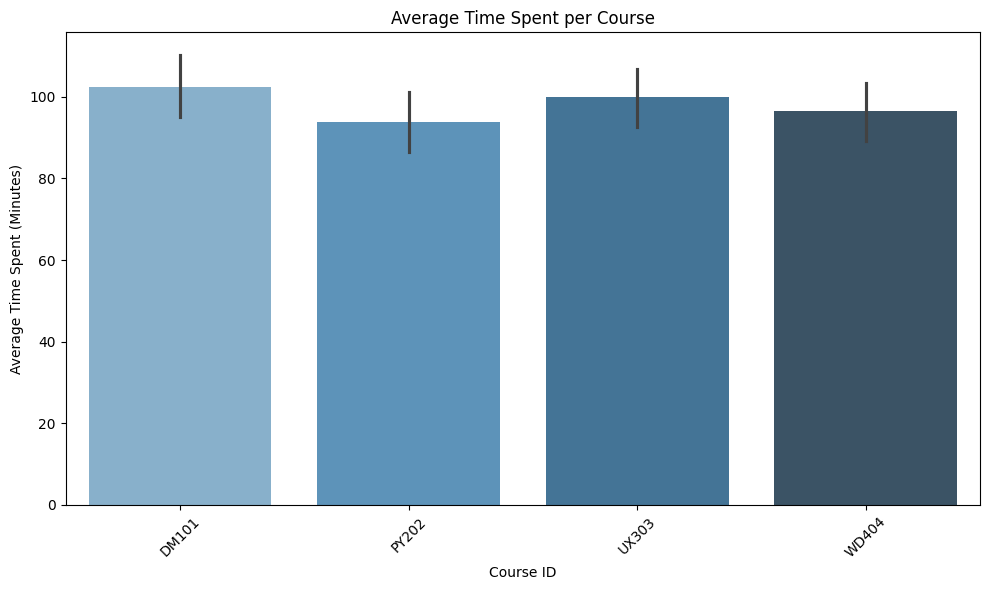

In [176]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes', 
            estimator='mean', hue='Course_ID', palette='Blues_d', legend=False)
plt.title("Average Time Spent per Course")
plt.xlabel("Course ID")
plt.ylabel("Average Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("my_plot_1.png", bbox_inches='tight')
plt.show()



### 📊 V.2 Box Plot: Time Spent by Age Group

This section visualizes the **time spent per course** across different **age groups** using a **box plot**. The box plot is a great way to show the distribution of time spent and to identify patterns or outliers within each age group.

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\682748912.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Age_Group', y='Time_Spent_Minutes', palette='coolwarm')


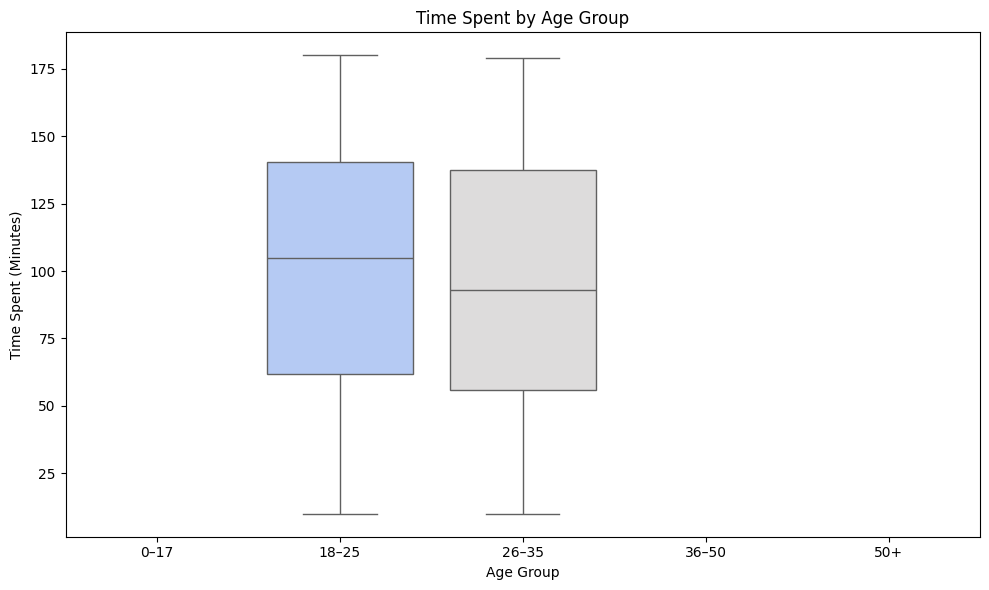

In [178]:
# Age Group creation
bins = [0, 17, 25, 35, 50, 100]
labels = ['0–17', '18–25', '26–35', '36–50', '50+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='Age_Group', y='Time_Spent_Minutes', palette='coolwarm')
plt.title("Time Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")
plt.tight_layout()
plt.savefig("my_plot_2.png", bbox_inches='tight')
plt.show()

### 📊 V.3 Average Time Spent by Location and Gender

This section visualizes the **average time spent per course** by **location** and **gender**. This analysis helps Zylentrix understand how student engagement varies across different geographic regions and gender groups, providing insights for targeted content development and engagement strategies.

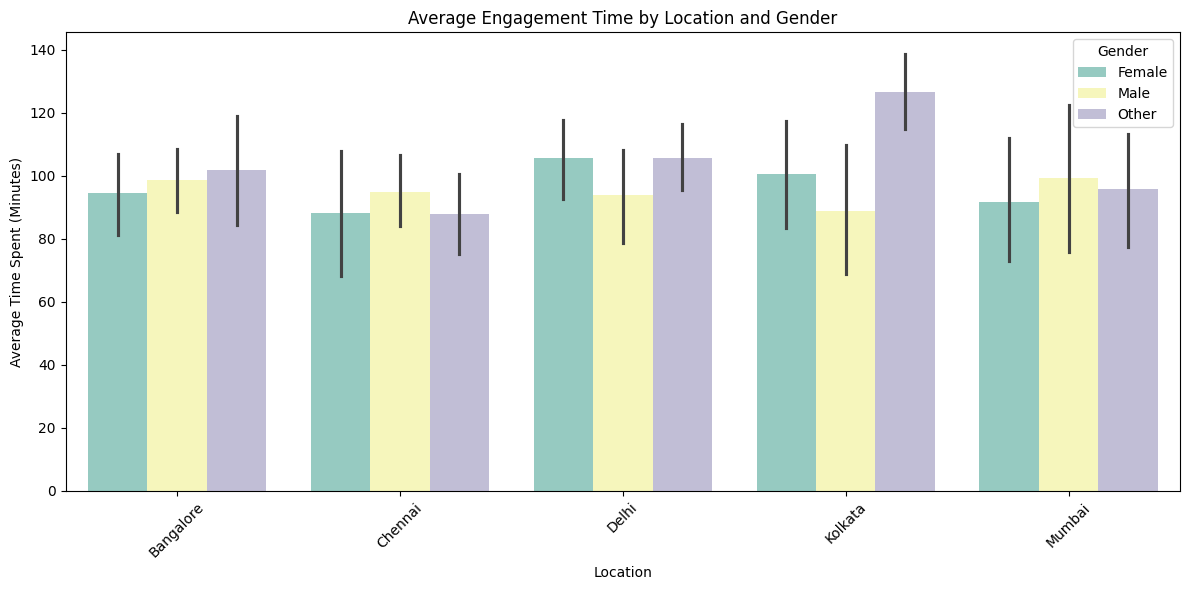

In [181]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged_df, x='Location', y='Time_Spent_Minutes', hue='Gender', 
            estimator='mean', palette='Set3')
plt.title("Average Engagement Time by Location and Gender")
plt.xlabel("Location")
plt.ylabel("Average Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_3.png", bbox_inches='tight')
plt.show()

### 📊 V.4 Average Time Spent by Course and Location

This section visualizes the **average time spent per course** across different **locations**. Analyzing time spent by location helps Zylentrix understand regional differences in student engagement and identify areas where additional support or adjustments may be needed.

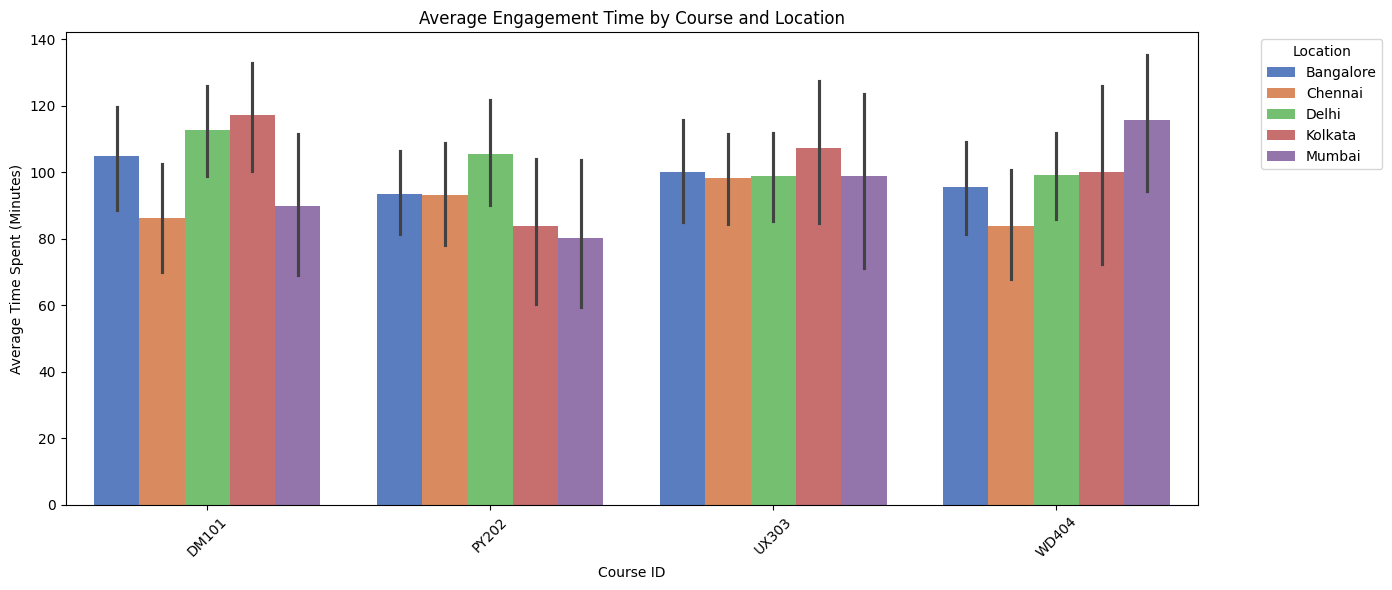

In [184]:
plt.figure(figsize=(14,6))
sns.barplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes', hue='Location',
            estimator='mean', palette='muted')
plt.title("Average Engagement Time by Course and Location")
plt.xlabel("Course ID")
plt.ylabel("Average Time Spent (Minutes)")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_4.png", bbox_inches='tight')
plt.show()


### 📊 V.5 Scatter Plot: Completion % vs Time Spent

This section visualizes the relationship between **course completion percentage** and **time spent** by students using a **scatter plot**. The scatter plot allows Zylentrix to identify patterns or correlations between how much time students spend on a course and how likely they are to complete it.


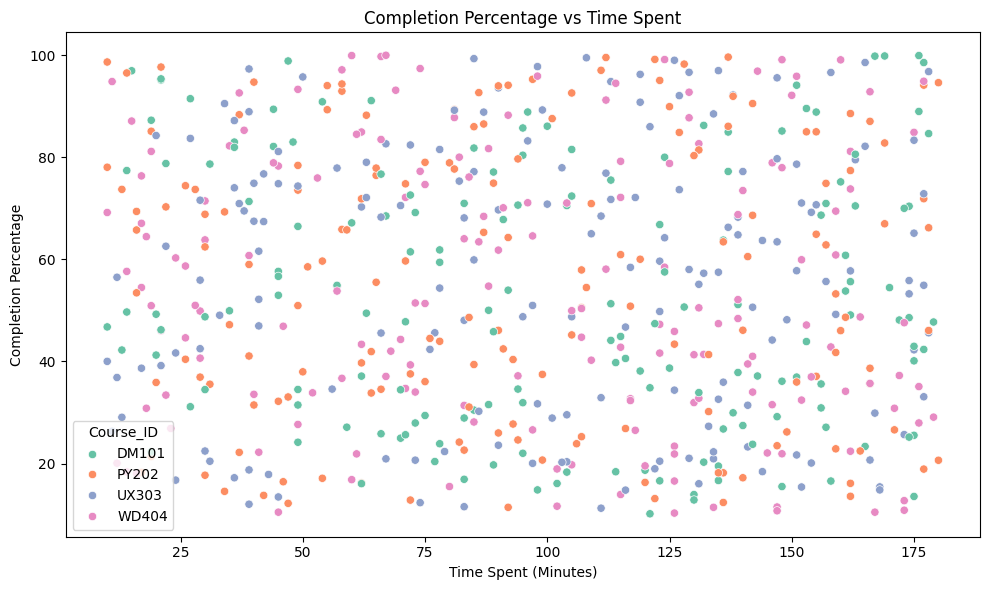

In [186]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Time_Spent_Minutes', y='Completion_Percentage', hue='Course_ID', palette='Set2')
plt.title("Completion Percentage vs Time Spent")
plt.xlabel("Time Spent (Minutes)")
plt.ylabel("Completion Percentage")
plt.tight_layout()
plt.savefig("my_plot_5.png", bbox_inches='tight')
plt.show()

### 📊 V.6 Heatmap: Correlation Matrix

This section visualizes the **correlation matrix** using a **heatmap**, providing insights into the relationships between various variables, such as **time spent**, **completion percentage**, **feedback ratings**, and more. A correlation matrix helps identify which variables are positively or negatively correlated, guiding decisions for course content, engagement strategies, and user experience improvements.

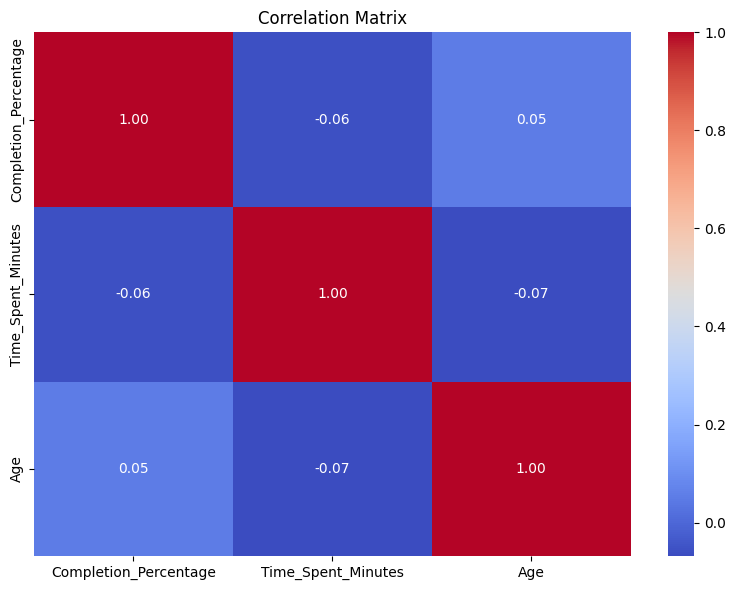

In [189]:
plt.figure(figsize=(8,6))
numeric_cols = merged_df[['Completion_Percentage', 'Time_Spent_Minutes', 'Age']].dropna()
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("my_plot_6.png", bbox_inches='tight')
plt.show()


### 📊 V.7 Average Completion Rate by Age Group

This section visualizes the **average completion rate** for courses across different **age groups**. Understanding completion rates by age group helps Zylentrix identify which demographics are more likely to finish their courses and where additional support may be needed.

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3726258995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_completion_by_age = merged_df.groupby('Age_Group')['Completion_Percentage'].mean().reset_index()


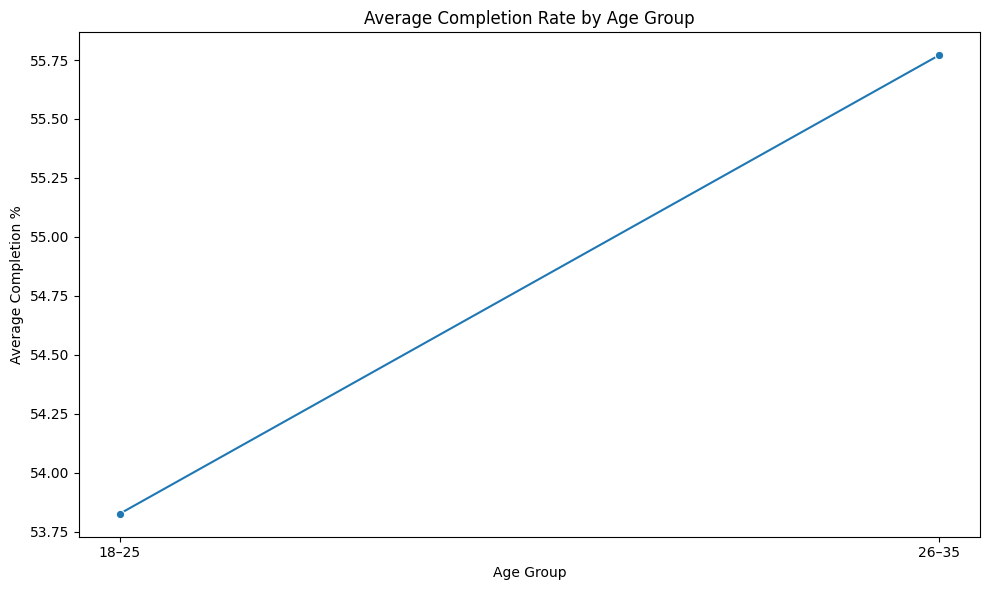

In [191]:
avg_completion_by_age = merged_df.groupby('Age_Group')['Completion_Percentage'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_completion_by_age, x='Age_Group', y='Completion_Percentage', marker='o')
plt.title("Average Completion Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Completion %")
plt.tight_layout()
plt.savefig("my_plot_7.png", bbox_inches='tight')
plt.show()

### 📊 V.8 Average Rating per Course

This section visualizes the **average rating** for each course, providing insights into how students perceive the quality of the courses. Understanding the average rating per course helps Zylentrix identify which courses are well-received and which may need improvements based on student feedback.

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3994918635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feedback_df, x='Course_ID', y='Rating', estimator='mean', palette='coolwarm')


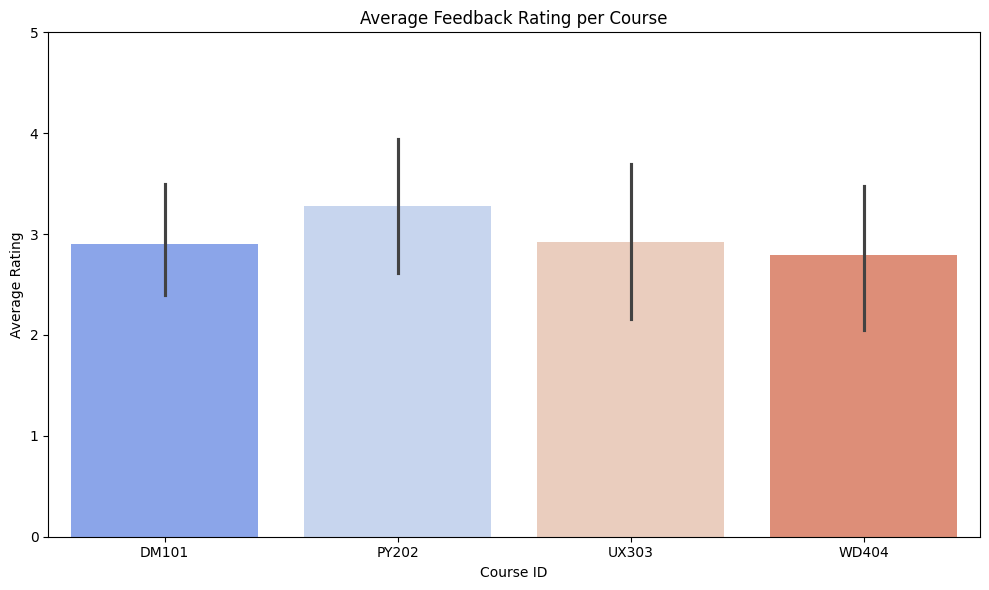

In [194]:
plt.figure(figsize=(10,6))
sns.barplot(data=feedback_df, x='Course_ID', y='Rating', estimator='mean', palette='coolwarm')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Course ID")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("my_plot_8.png", bbox_inches='tight')
plt.show()


### 📊 V.9 Distribution of Ratings by Course

This section visualizes the **distribution of ratings** for each course, giving insight into how students have rated the courses across the entire rating scale. Understanding the distribution helps Zylentrix see not only the average ratings but also the range of opinions, from extremely satisfied to dissatisfied students.


C:\Users\hp\AppData\Local\Temp\ipykernel_19484\3667108862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=feedback_df, x='Course_ID', y='Rating', palette='pastel')


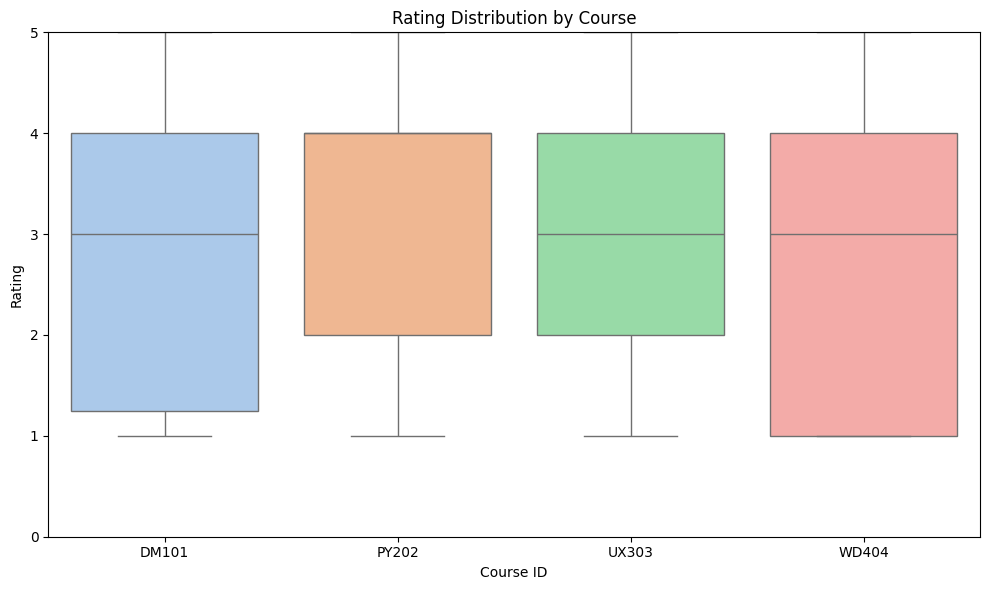

In [197]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=feedback_df, x='Course_ID', y='Rating', palette='pastel')
plt.title("Rating Distribution by Course")
plt.xlabel("Course ID")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("my_plot_9.png", bbox_inches='tight')
plt.show()


### 📊 V.10 Average Rating by Location

This section visualizes the **average rating** for courses across different **locations**, helping Zylentrix understand how students in various regions perceive the quality of the courses. By analyzing average ratings by location, Zylentrix can identify geographic areas where courses are highly rated and where there may be room for improvement.

C:\Users\hp\AppData\Local\Temp\ipykernel_19484\1944539277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_feedback, x='Location', y='Rating', estimator='mean', palette='Set2')


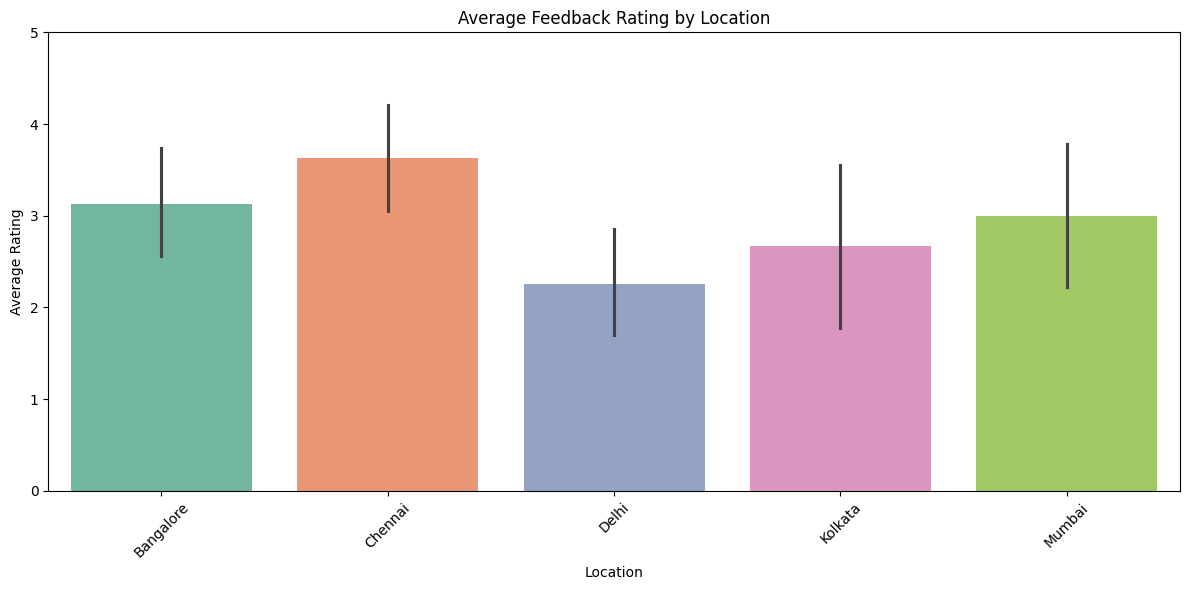

In [200]:
merged_feedback = pd.merge(feedback_df,student_df[['Student_ID', 'Location']], on='Student_ID', how='left')

plt.figure(figsize=(12,6))
sns.barplot(data=merged_feedback, x='Location', y='Rating', estimator='mean', palette='Set2')
plt.title("Average Feedback Rating by Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_10.png", bbox_inches='tight')
plt.show()


### 📊 V.11 Average Rating by Course and Location

This section visualizes the **average rating** for each **course** across different **locations**, providing insights into how students from various regions perceive each course. This helps Zylentrix identify which courses are performing well in specific regions and where improvements may be needed.

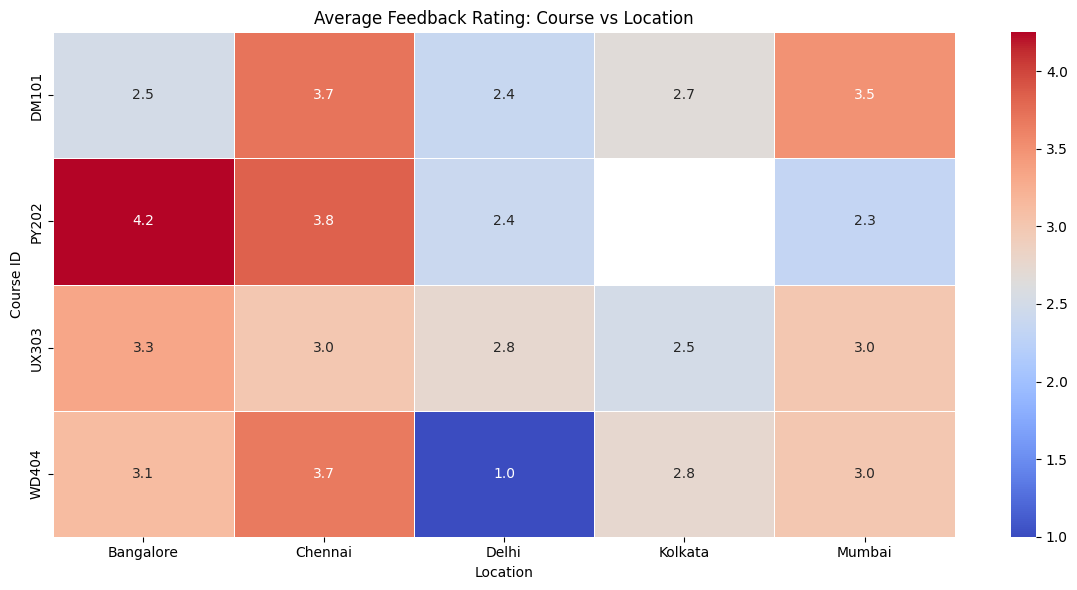

In [352]:
pivot_table = merged_feedback.pivot_table(
    index='Course_ID',
    columns='Location',
    values='Rating',
    aggfunc='mean',
    observed=False)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Average Feedback Rating: Course vs Location")
plt.xlabel("Location")
plt.ylabel("Course ID")
plt.tight_layout()
plt.savefig("my_plot_11.png", bbox_inches='tight')
plt.show()

In [355]:
student_df['Enroll_Month'] = student_df['Enrolment_Date'].dt.to_period('M')
course_df['Activity_Month'] = course_df['Date'].dt.to_period('M')


### 📊 V.12 Monthly Enrollments Over Time

This section visualizes the **monthly enrollment trend**, showing how the total number of enrollments has changed over time. This insight is critical for Zylentrix to understand patterns in student sign-ups, including peak periods and any seasonality in enrollments.

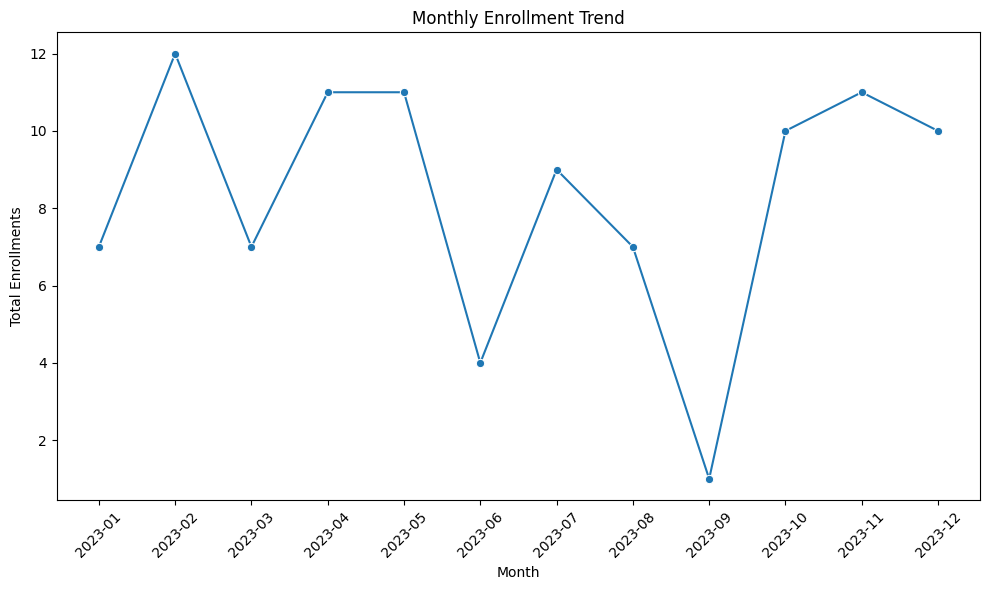

In [358]:
enroll_trend =student_df.groupby('Enroll_Month').size().reset_index(name='Total_Enrollments')
enroll_trend['Enroll_Month'] = enroll_trend['Enroll_Month'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=enroll_trend, x='Enroll_Month', y='Total_Enrollments', marker='o')
plt.title("Monthly Enrollment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrollments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_12.png", bbox_inches='tight')
plt.show()


### 📊 V.13 Average Completion Rate Over Time

This section visualizes the **average completion rate** of courses over time, giving insights into how students are progressing through their courses month by month. Monitoring completion rates helps Zylentrix understand trends in student engagement and course effectiveness, which can inform strategies for improving course structure or addressing potential barriers to completion.

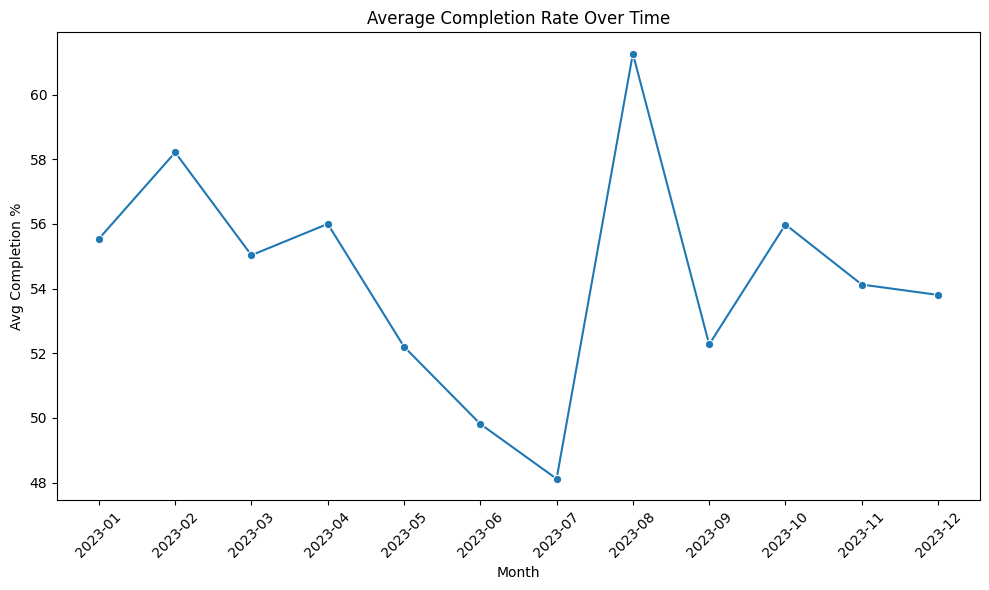

In [362]:
# Merge first if needed
merged_df['Activity_Month'] = pd.to_datetime(merged_df['Enrolment_Date'], errors='coerce').dt.to_period('M')
completion_trend = merged_df.groupby('Activity_Month')['Completion_Percentage'].mean().reset_index()
completion_trend['Activity_Month'] = completion_trend['Activity_Month'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=completion_trend, x='Activity_Month', y='Completion_Percentage', marker='o')
plt.title("Average Completion Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Completion %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_13.png", bbox_inches='tight')
plt.show()


In [364]:
# Save student data
student_df.to_csv('cleaned_student_data.csv', index=False)

# Save course data
course_df.to_csv('cleaned_course_data.csv', index=False)

# Save feedback data
feedback_df.to_csv('cleaned_feedback_data.csv', index=False)
